In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_DIST_3b.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows and the columns of the dataset
dataset_info = {
    "columns": dataset.columns.tolist(),
    "first_rows": dataset.head()
}

dataset_info


{'columns': ['prov_char',
  'country_char',
  'wavenumber',
  '11544',
  '11540',
  '11536',
  '11532',
  '11528',
  '11524',
  '11520',
  '11516',
  '11512',
  '11508',
  '11504',
  '11500',
  '11496',
  '11492',
  '11488',
  '11484',
  '11480',
  '11476',
  '11472',
  '11468',
  '11464',
  '11460',
  '11456',
  '11452',
  '11448',
  '11444',
  '11440',
  '11436',
  '11432',
  '11428',
  '11424',
  '11420',
  '11416',
  '11412',
  '11408',
  '11404',
  '11400',
  '11396',
  '11392',
  '11388',
  '11384',
  '11380',
  '11376',
  '11372',
  '11368',
  '11364',
  '11360',
  '11356',
  '11352',
  '11348',
  '11344',
  '11340',
  '11336',
  '11332',
  '11328',
  '11324',
  '11320',
  '11316',
  '11312',
  '11308',
  '11304',
  '11300',
  '11296',
  '11292',
  '11288',
  '11284',
  '11280',
  '11276',
  '11272',
  '11268',
  '11264',
  '11260',
  '11256',
  '11252',
  '11248',
  '11244',
  '11240',
  '11236',
  '11232',
  '11228',
  '11224',
  '11220',
  '11216',
  '11212',
  '11208',
  '11

In [3]:
# Remove the 'thnoth_name_encoded' column
dataset_cleaned = dataset.drop(columns=['thnoth_name_encoded'])

# Display the first few rows of the cleaned dataset to confirm the removal
dataset_cleaned.head()

,prov_char,country_char,wavenumber,11544,11540,11536,11532,11528,11524,11520,...,3968,3964,3960,3956,3952,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,KAX,ID,ID-KAX-088-2401-001,0.290252,0.290122,0.290044,0.290029,0.290042,0.289978,0.289851,...,3.572119,3.558086,3.542757,3.530849,3.501222,Group 3,Group 2,Group 4,Indonesia,Non-Thai
1,KBX,ID,ID-KBX-068-2306-003,0.522845,0.522798,0.522826,0.522669,0.522414,0.522217,0.522070,...,3.678293,3.680422,3.655416,3.629388,3.606223,Group 3,Group 2,Group 4,Indonesia,Non-Thai
2,BBX,ID,ID-BBX-095-2401-004,-0.144108,-0.144008,-0.143893,-0.143777,-0.143686,-0.143667,-0.143678,...,3.663113,3.650478,3.623180,3.614590,3.581875,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,SUX,ID,ID-SUX-074-2311-001,0.333905,0.333777,0.333785,0.333700,0.333522,0.333453,0.333446,...,3.640250,3.601331,3.566453,3.539593,3.512285,Group 3,Group 2,Group 3,Indonesia,Non-Thai
4,SUX,ID,ID-SUX-073-2311-001,1.522433,1.521460,1.521133,1.521072,1.521494,1.522300,1.521840,...,4.108162,4.103365,4.125110,4.113971,4.055192,Group 3,Group 2,Group 3,Indonesia,Non-Thai


In [4]:
print(dataset_cleaned)

    prov_char country_char           wavenumber     11544     11540     11536  \
0         KAX           ID  ID-KAX-088-2401-001  0.290252  0.290122  0.290044   
1         KBX           ID  ID-KBX-068-2306-003  0.522845  0.522798  0.522826   
2         BBX           ID  ID-BBX-095-2401-004 -0.144108 -0.144008 -0.143893   
3         SUX           ID  ID-SUX-074-2311-001  0.333905  0.333777  0.333785   
4         SUX           ID  ID-SUX-073-2311-001  1.522433  1.521460  1.521133   
..        ...          ...                  ...       ...       ...       ...   
935       KBI           TH  TH-KBI-011-2312-006 -0.125889 -0.125817 -0.125756   
936       KBI           TH  TH-KBI-011-2312-008  2.249752  2.248260  2.244932   
937       SNI           TH  TH-SNI-012-2312-007  1.726070  1.726630  1.727145   
938       TRG           TH  TH-TRG-012-2312-001  1.192585  1.192232  1.191999   
939       NRT           TH  TH-NRT-029-2312-004 -0.060906 -0.060837 -0.060787   

        11532     11528    

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting relevant columns for visualization (all columns with numeric values)
nir_spectra = dataset_cleaned.drop(columns=['prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])

# Normalizing the spectra on the highest peak
nir_spectra_normalized = nir_spectra.div(nir_spectra.max(axis=1), axis=0)



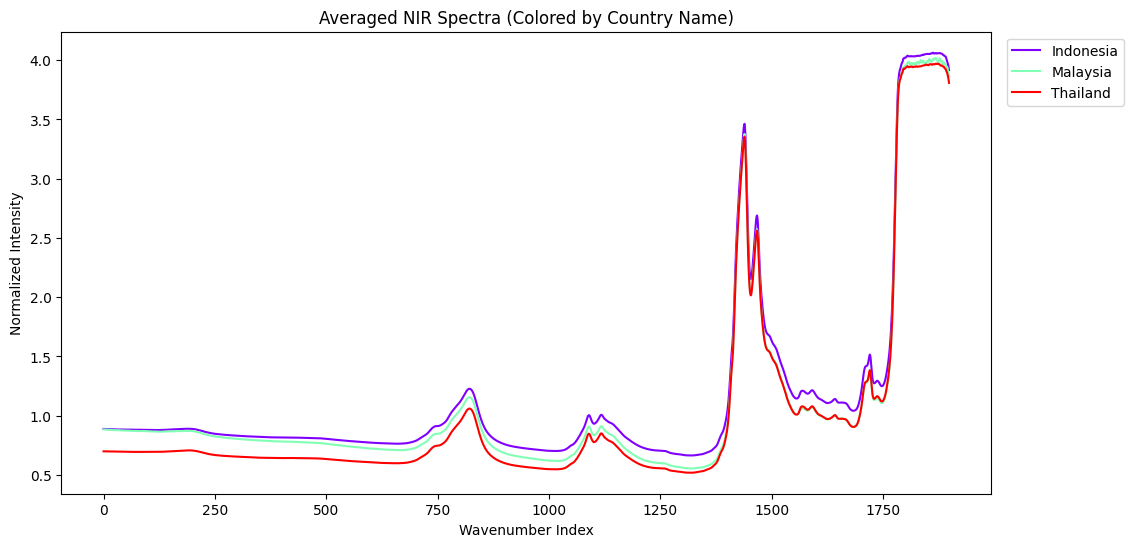

In [6]:
# Grouping and averaging the spectra by 'country_name'
grouped_by_country = dataset_cleaned.groupby('country_name').mean(numeric_only=True)

# Plotting function for averaged spectra
def plot_averaged_spectra(data, title, labels):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

    for i, (label, spectrum) in enumerate(data.items()):
        plt.plot(spectrum, color=colors[i], label=label)
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Normalized Intensity')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# Preparing data for plotting
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra (Colored by Country Name)', grouped_by_country.index)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


dataset2 = dataset_cleaned.copy()

# Extracting relevant columns for normalization and averaging
spectra_columns = dataset2.columns[3:-5]  # Adjust column selection as needed



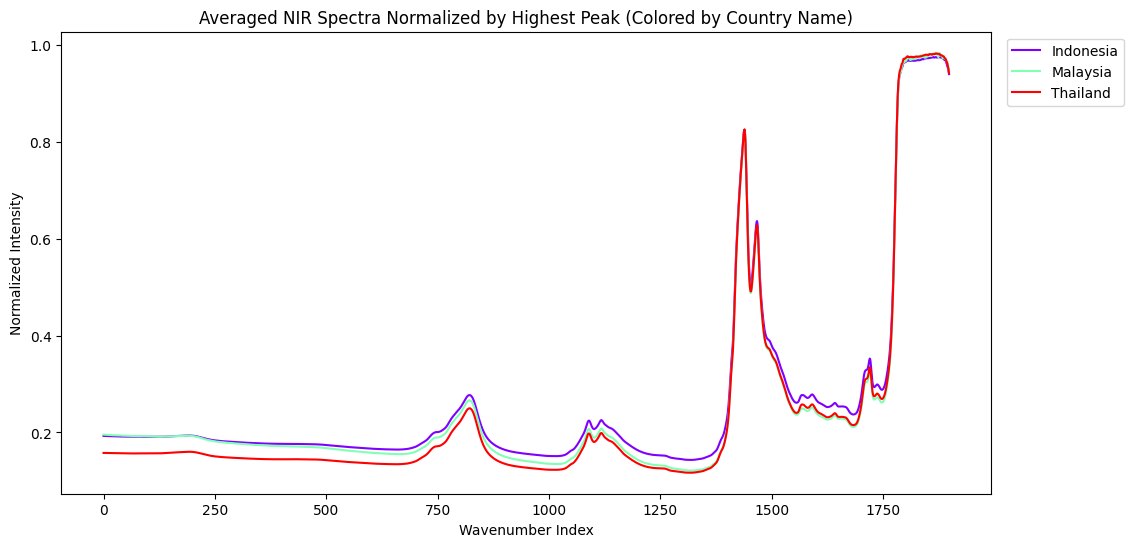

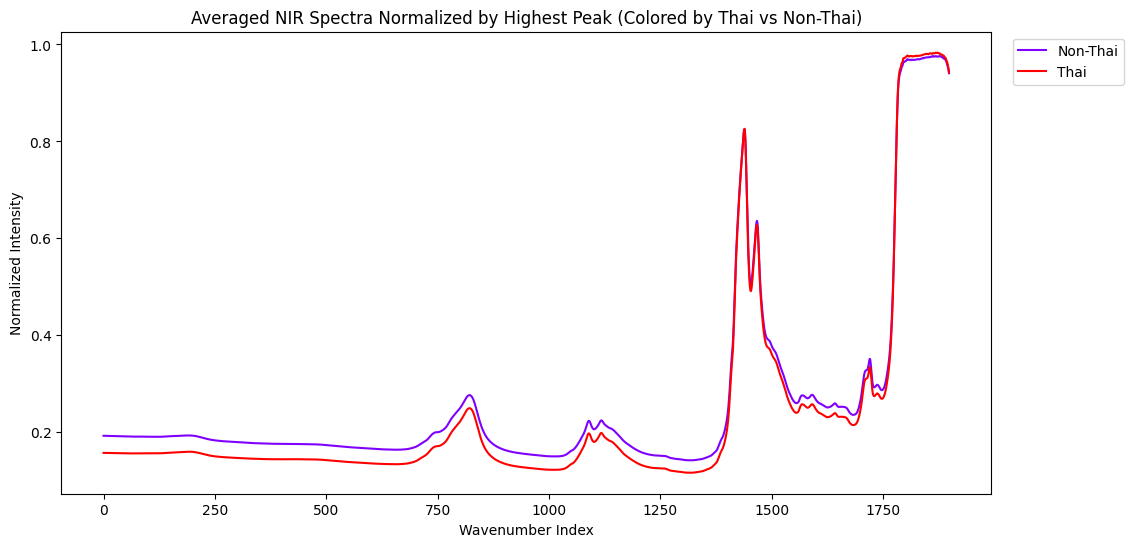

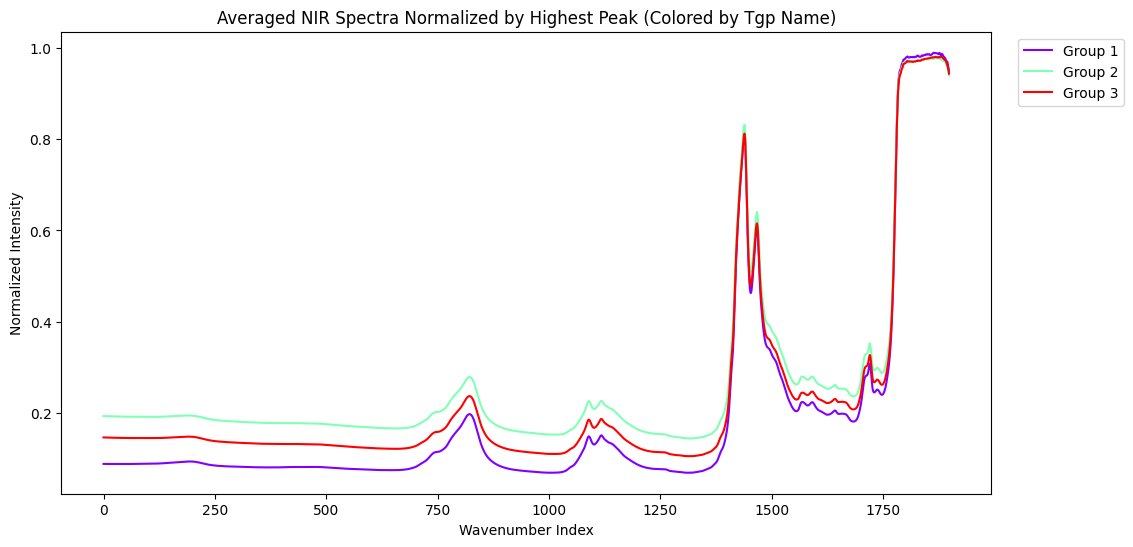

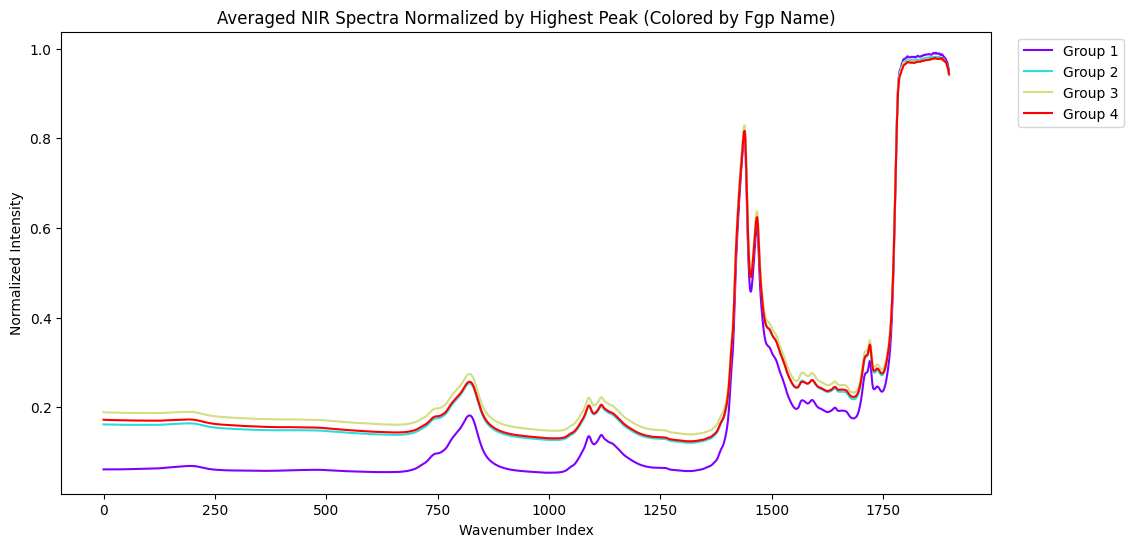

In [8]:

# Normalize each spectrum by the highest peak
dataset2[spectra_columns] = dataset2[spectra_columns].div(dataset2[spectra_columns].max(axis=1), axis=0)

# Function to plot averaged spectra for each category
def plot_averaged_spectra(data, title, labels):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

    for i, (label, spectrum) in enumerate(data.items()):
        plt.plot(spectrum, color=colors[i], label=label)
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Normalized Intensity')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# 1. Grouping and averaging the spectra by 'country_name'
grouped_by_country = dataset2.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Country Name)', grouped_by_country.index)

# 2. Grouping and averaging the spectra by 'thnoth_name'
grouped_by_thnoth = dataset2.groupby('thnoth_name').mean(numeric_only=True)
thnoth_spectra = {thnoth: grouped_by_thnoth.loc[thnoth].values for thnoth in grouped_by_thnoth.index}
plot_averaged_spectra(thnoth_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Thai vs Non-Thai)', grouped_by_thnoth.index)

# 3. Grouping and averaging the spectra by 'tgp_name'
grouped_by_tgp = dataset2.groupby('tgp_name').mean(numeric_only=True)
tgp_spectra = {tgp: grouped_by_tgp.loc[tgp].values for tgp in grouped_by_tgp.index}
plot_averaged_spectra(tgp_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Tgp Name)', grouped_by_tgp.index)

# 4. Grouping and averaging the spectra by 'fgp_name'
grouped_by_fgp = dataset2.groupby('fgp_name').mean(numeric_only=True)
fgp_spectra = {fgp: grouped_by_fgp.loc[fgp].values for fgp in grouped_by_fgp.index}
plot_averaged_spectra(fgp_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Fgp Name)', grouped_by_fgp.index)

(BELOW) NO AVERAAGING

In [9]:
dataset3 = dataset2.copy()

In [10]:
# Extracting relevant columns for normalization
spectra_columns = dataset3.columns[3:-5]  # Adjust column selection as needed

# Normalize each spectrum by the highest peak
dataset3[spectra_columns] = dataset3[spectra_columns].div(dataset3[spectra_columns].max(axis=1), axis=0)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot spectra for each category without averaging
def plot_spectra_by_category(data, category_column, title):
    plt.figure(figsize=(12, 6))
    unique_values = data[category_column].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for i, unique_value in enumerate(unique_values):
        subset = data[data[category_column] == unique_value]
        for index, row in subset.iterrows():
            plt.plot(row[spectra_columns], color=colors[i], alpha=0.3, label=unique_value if index == subset.index[0] else "")
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Normalized Intensity')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


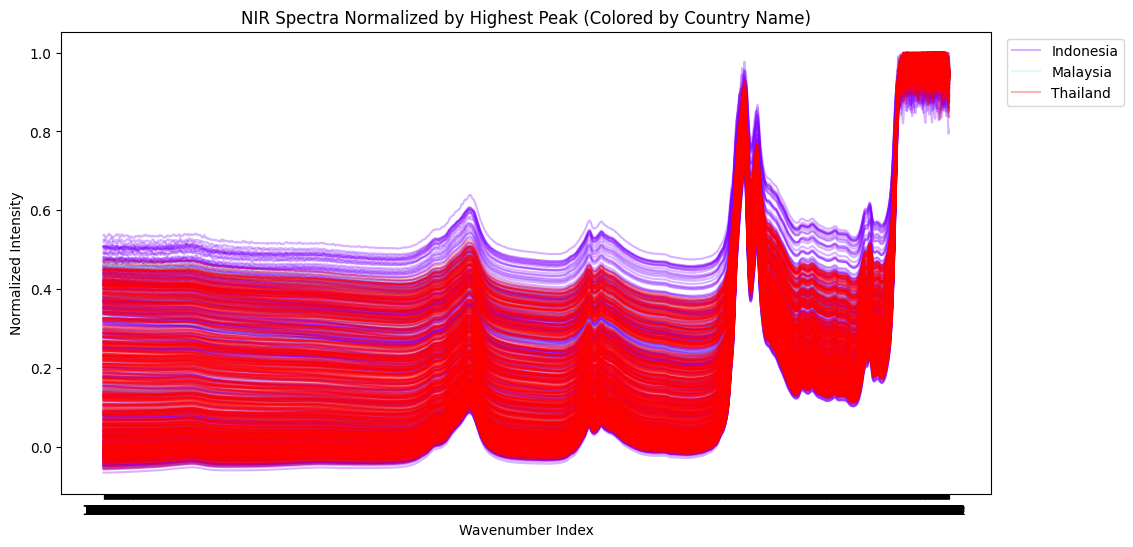

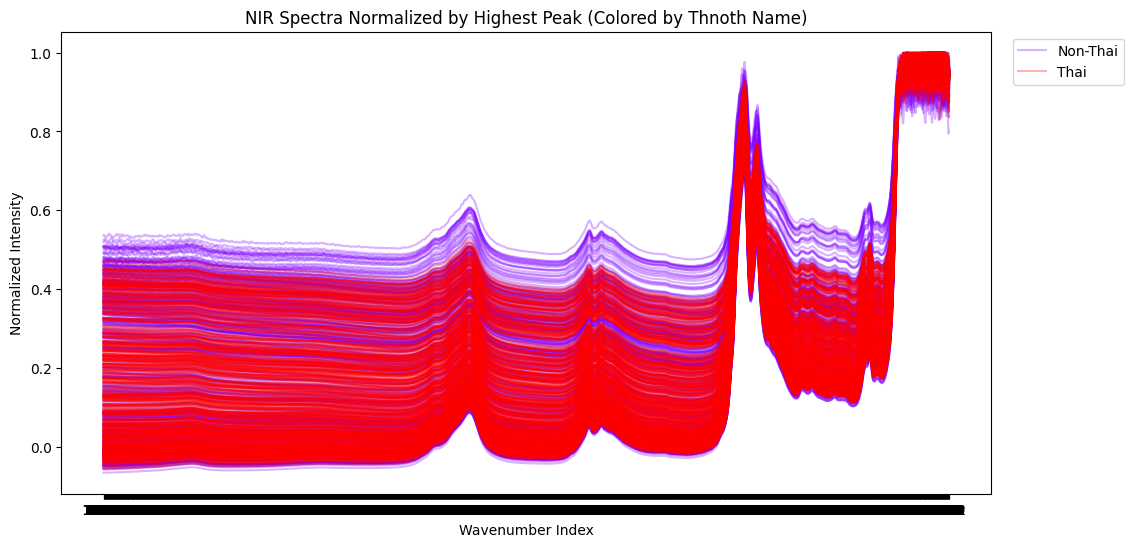

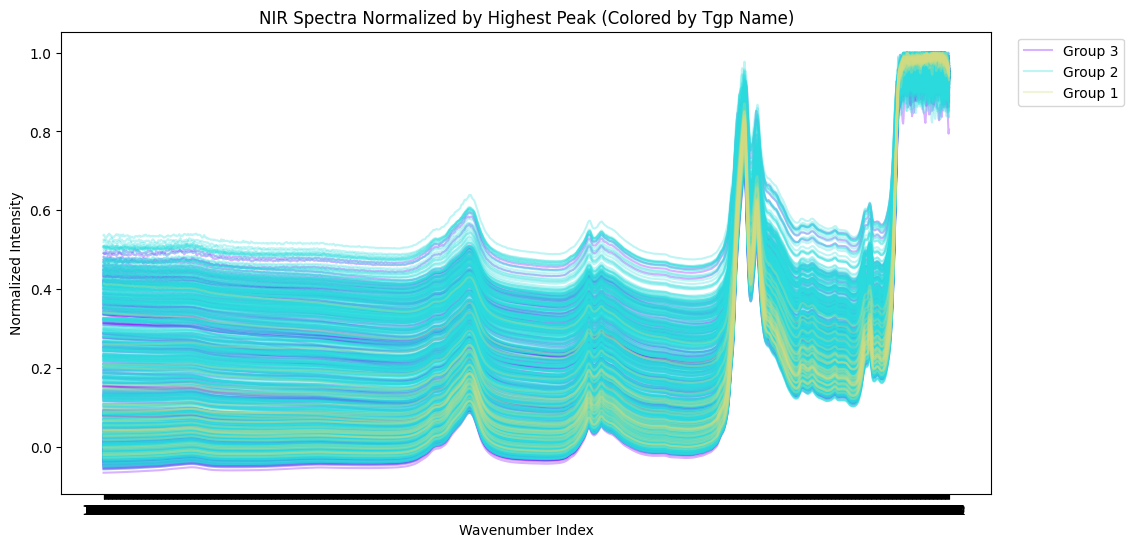

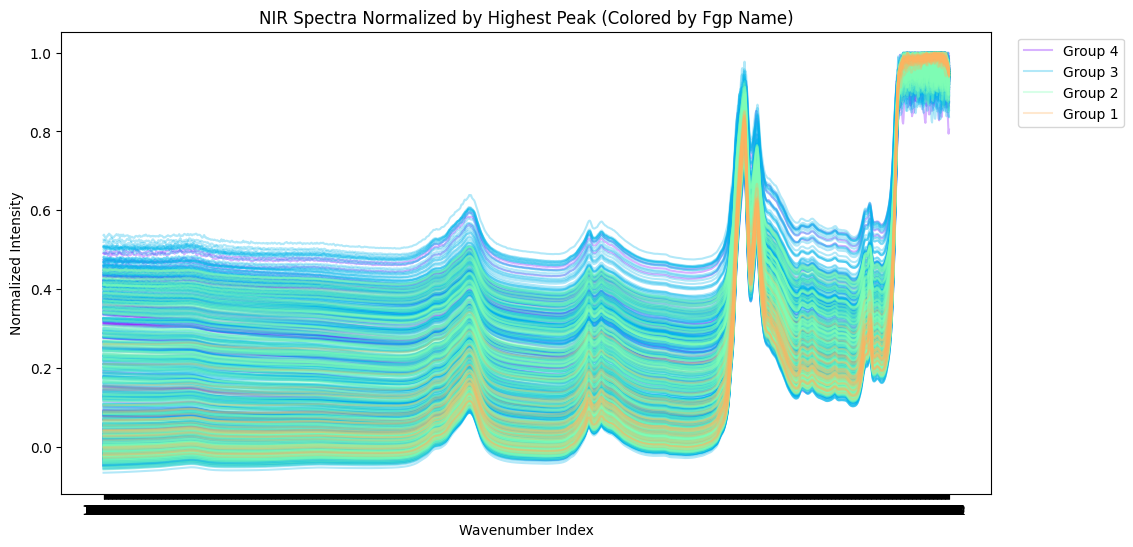

In [12]:
# Plotting the spectra without averaging
plot_spectra_by_category(dataset3, 'country_name', 'NIR Spectra Normalized by Highest Peak (Colored by Country Name)')
plot_spectra_by_category(dataset3, 'thnoth_name', 'NIR Spectra Normalized by Highest Peak (Colored by Thnoth Name)')
plot_spectra_by_category(dataset3, 'tgp_name', 'NIR Spectra Normalized by Highest Peak (Colored by Tgp Name)')
plot_spectra_by_category(dataset3, 'fgp_name', 'NIR Spectra Normalized by Highest Peak (Colored by Fgp Name)')


BASELINE CORRECTION

In [13]:
dataset4 = dataset_cleaned.copy()

In [14]:
from scipy.signal import savgol_filter

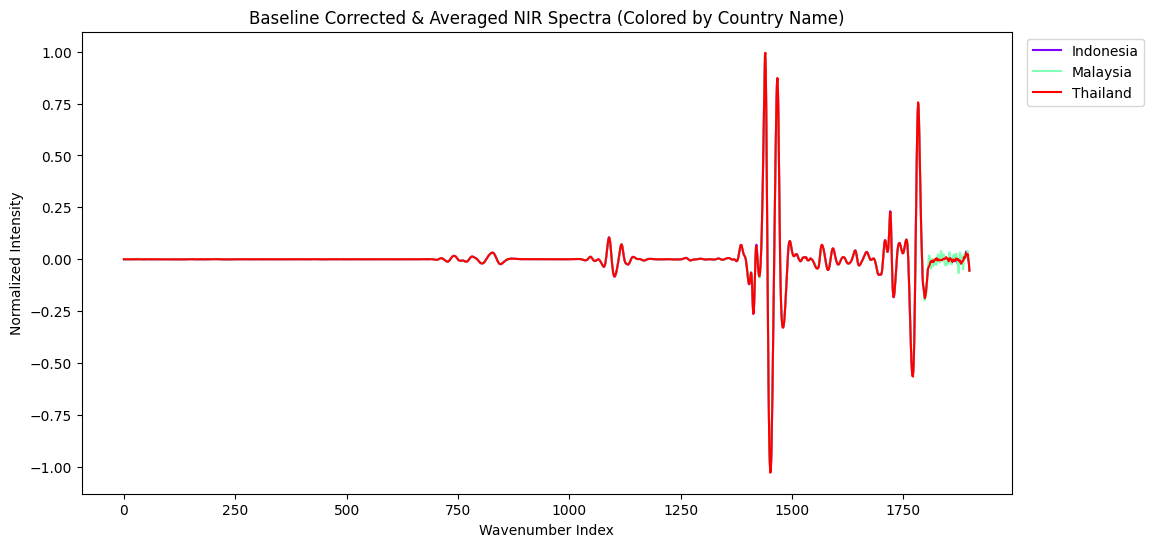

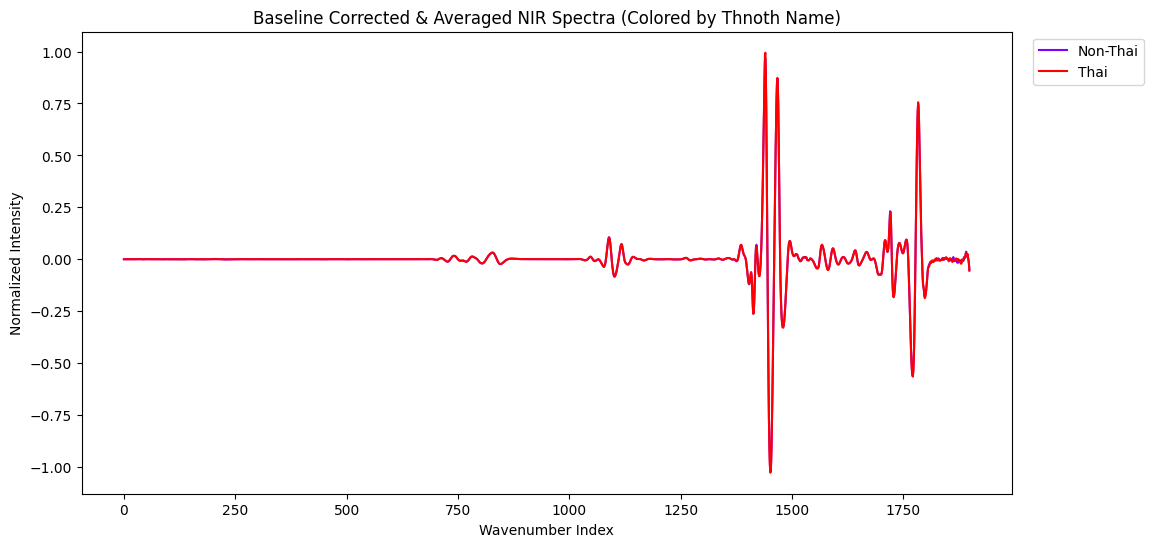

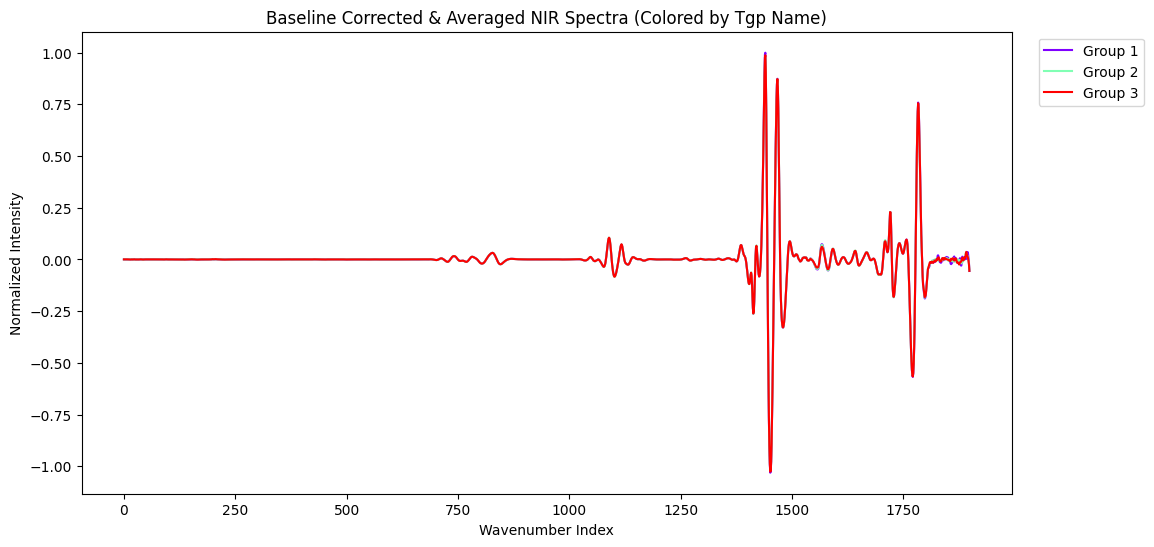

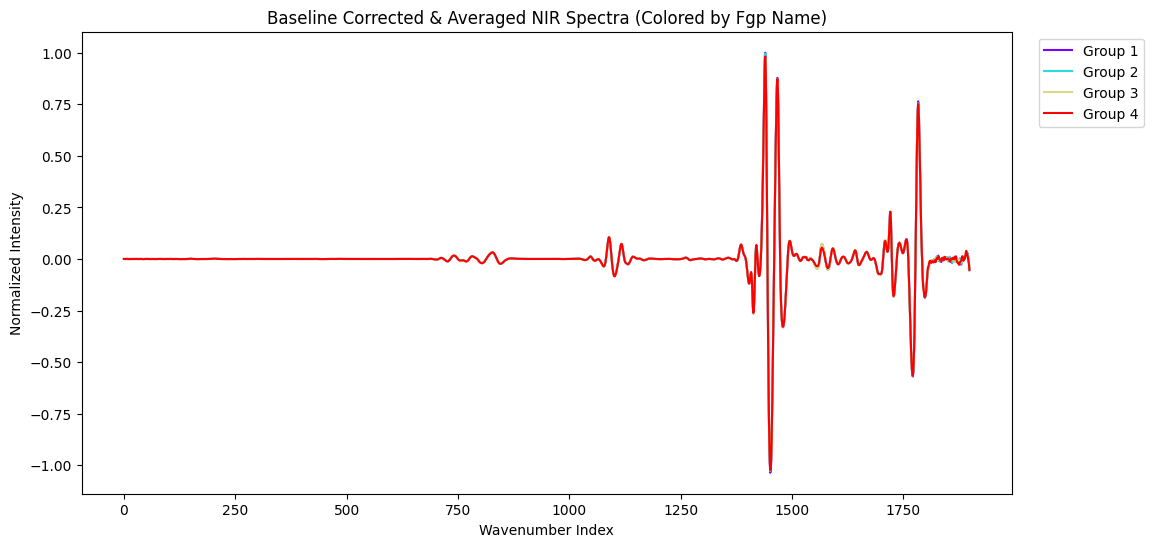

In [15]:
# Remove the 'thnoth_name_encoded' column
dataset4 = dataset.drop(columns=['thnoth_name_encoded'])

# Extracting relevant columns for normalization and averaging
spectra_columns = dataset4.columns[3:-5]  # Adjust column selection as needed

# Baseline correction using Savitzky-Golay filter
def baseline_correction(spectra):
    return spectra - savgol_filter(spectra, 51, 3)

# Apply baseline correction to each spectrum
dataset4[spectra_columns] = dataset4[spectra_columns].apply(baseline_correction, axis=1)

# Normalize each spectrum by the highest peak
dataset4[spectra_columns] = dataset4[spectra_columns].div(dataset4[spectra_columns].max(axis=1), axis=0)

# Function to plot averaged spectra for each category
def plot_averaged_spectra(data, title, labels):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

    for i, (label, spectrum) in enumerate(data.items()):
        plt.plot(spectrum, color=colors[i], label=label)
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Normalized Intensity')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# 1. Grouping and averaging the spectra by 'country_name'
grouped_by_country = dataset4.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Baseline Corrected & Averaged NIR Spectra (Colored by Country Name)', grouped_by_country.index)

# 2. Grouping and averaging the spectra by 'thnoth_name'
grouped_by_thnoth = dataset4.groupby('thnoth_name').mean(numeric_only=True)
thnoth_spectra = {thnoth: grouped_by_thnoth.loc[thnoth].values for thnoth in grouped_by_thnoth.index}
plot_averaged_spectra(thnoth_spectra, 'Baseline Corrected & Averaged NIR Spectra (Colored by Thnoth Name)', grouped_by_thnoth.index)

# 3. Grouping and averaging the spectra by 'tgp_name'
grouped_by_tgp = dataset4.groupby('tgp_name').mean(numeric_only=True)
tgp_spectra = {tgp: grouped_by_tgp.loc[tgp].values for tgp in grouped_by_tgp.index}
plot_averaged_spectra(tgp_spectra, 'Baseline Corrected & Averaged NIR Spectra (Colored by Tgp Name)', grouped_by_tgp.index)

# 4. Grouping and averaging the spectra by 'fgp_name'
grouped_by_fgp = dataset4.groupby('fgp_name').mean(numeric_only=True)
fgp_spectra = {fgp: grouped_by_fgp.loc[fgp].values for fgp in grouped_by_fgp.index}
plot_averaged_spectra(fgp_spectra, 'Baseline Corrected & Averaged NIR Spectra (Colored by Fgp Name)', grouped_by_fgp.index)

In [16]:
dataset5 = dataset_cleaned.copy()

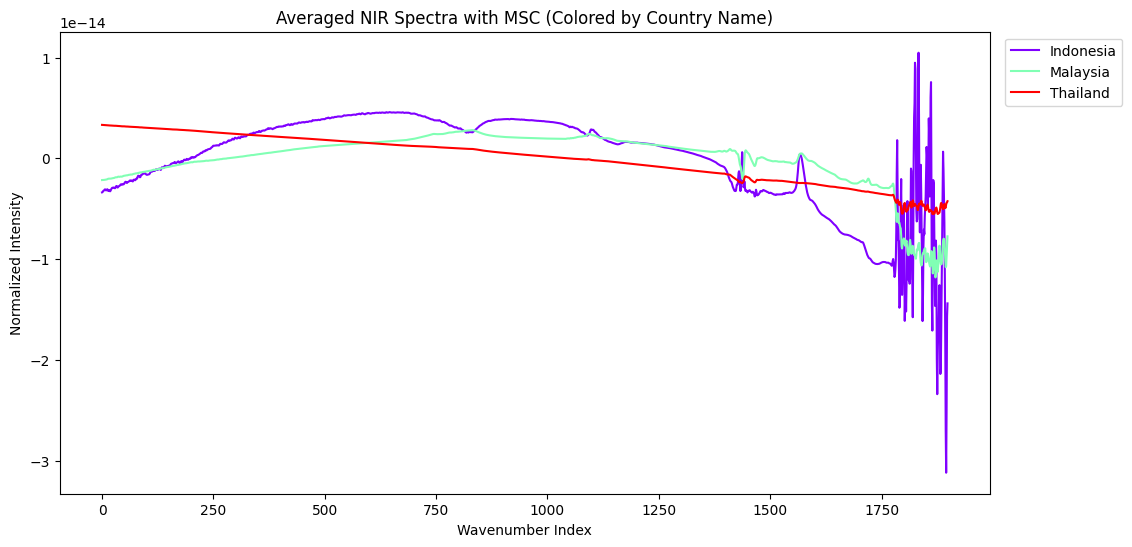

In [17]:
# Remove the 'thnoth_name_encoded' column
dataset5 = dataset.drop(columns=['thnoth_name_encoded'])

# Extracting relevant columns for normalization and averaging
spectra_columns = dataset5.columns[3:-5]  # Adjust column selection as needed

# Multiplicative Scatter Correction (MSC)
def msc(input_data, reference=None):
    # Mean center the data
    input_data -= input_data.mean(axis=0)

    # Reference spectrum
    if reference is None:
        reference = np.mean(input_data, axis=0)

    # Define new array and iterate over individual spectra
    corrected_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        fit = np.polyfit(reference, input_data[i, :], 1, full=True)
        corrected_data[i, :] = (input_data[i, :] - fit[0][1]) / fit[0][0]
    
    return corrected_data

# Apply MSC
msc_spectra = msc(dataset5[spectra_columns].values)
msc_spectra_df = pd.DataFrame(msc_spectra, columns=spectra_columns)

# Function to plot averaged spectra for each category
def plot_averaged_spectra(data, title, labels):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

    for i, (label, spectrum) in enumerate(data.items()):
        plt.plot(spectrum, color=colors[i], label=label)
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Normalized Intensity')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# Grouping and averaging the MSC spectra by 'country_name'
dataset5[spectra_columns] = msc_spectra_df
grouped_by_country = dataset5.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra with MSC (Colored by Country Name)', grouped_by_country.index)

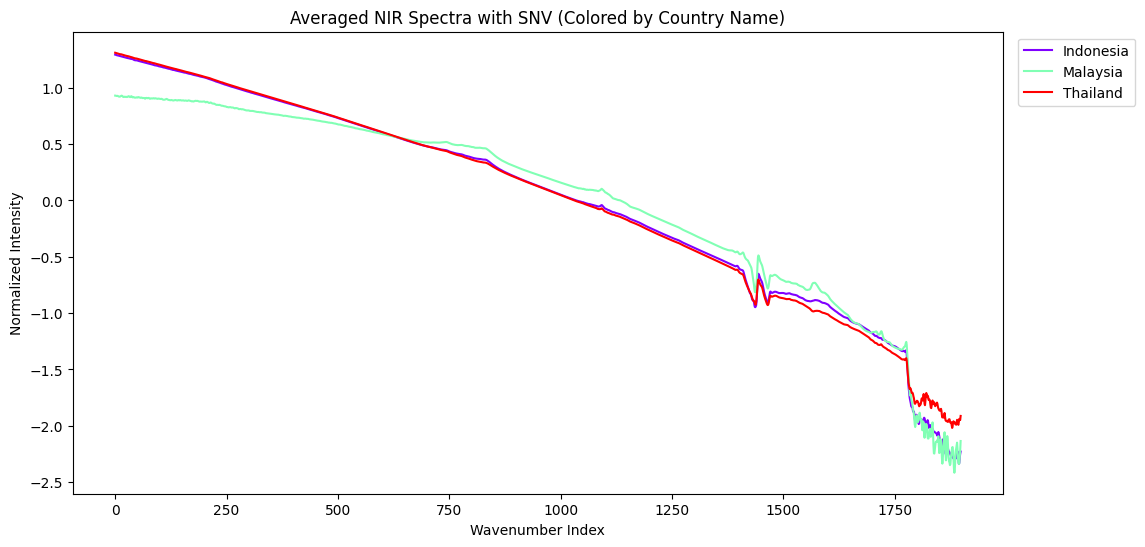

In [18]:
# Standard Normal Variate (SNV)
def snv(input_data):
    output_data = (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, ddof=1, keepdims=True)
    return output_data

# Apply SNV
snv_spectra = snv(dataset5[spectra_columns].values)
snv_spectra_df = pd.DataFrame(snv_spectra, columns=spectra_columns)

# Grouping and averaging the SNV spectra by 'country_name'
dataset5[spectra_columns] = snv_spectra_df
grouped_by_country = dataset5.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra with SNV (Colored by Country Name)', grouped_by_country.index)


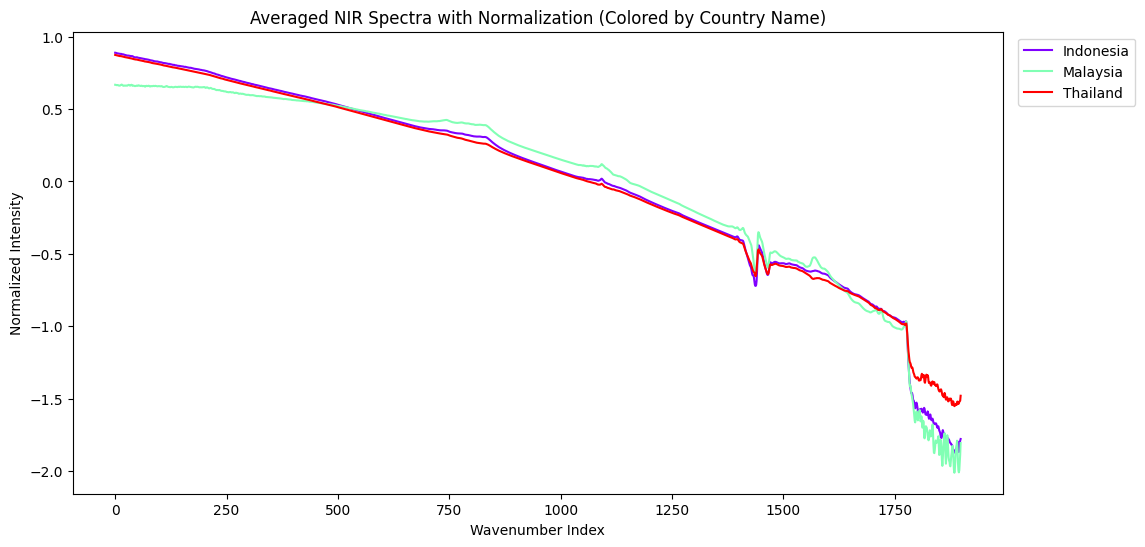

In [19]:
# Normalization
def normalize(input_data):
    return input_data / np.max(input_data, axis=1, keepdims=True)

# Apply normalization
normalized_spectra = normalize(dataset5[spectra_columns].values)
normalized_spectra_df = pd.DataFrame(normalized_spectra, columns=spectra_columns)

# Grouping and averaging the normalized spectra by 'country_name'
dataset5[spectra_columns] = normalized_spectra_df
grouped_by_country = dataset5.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra with Normalization (Colored by Country Name)', grouped_by_country.index)


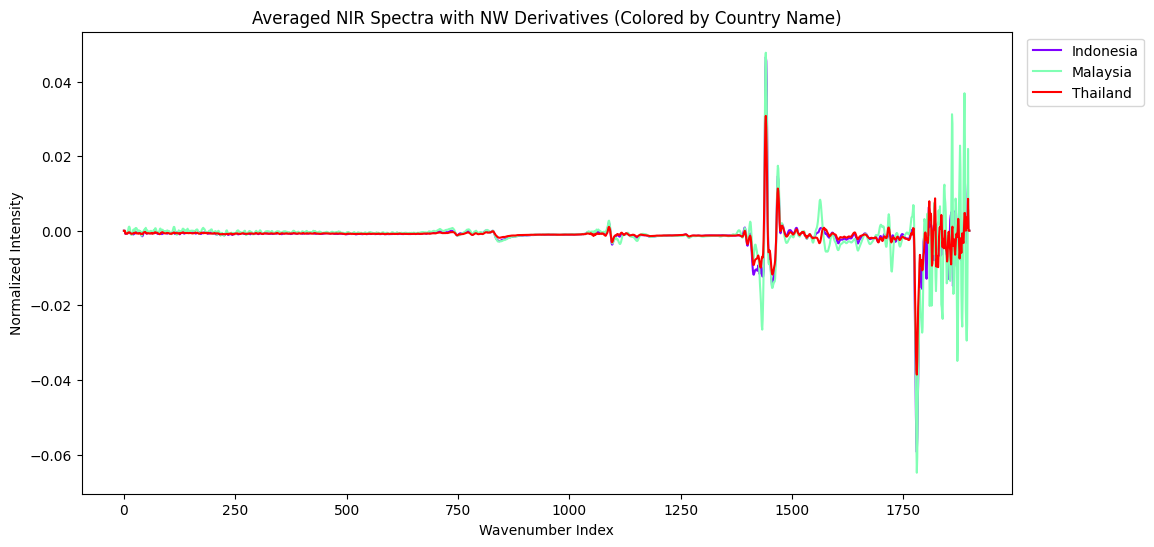

In [20]:
# Norris-Williams Derivative
def norris_williams(input_data, gap_size, derivative_order):
    m, n = input_data.shape
    smoothed_data = np.zeros_like(input_data)

    for i in range(m):
        for j in range(gap_size, n-gap_size):
            if derivative_order == 1:
                smoothed_data[i, j] = (input_data[i, j + gap_size] - input_data[i, j - gap_size]) / (2 * gap_size)
            elif derivative_order == 2:
                smoothed_data[i, j] = (input_data[i, j + gap_size] - 2 * input_data[i, j] + input_data[i, j - gap_size]) / (gap_size ** 2)
    return smoothed_data

# Apply NW derivative (first order, gap size 3)
nw_spectra = norris_williams(dataset5[spectra_columns].values, gap_size=3, derivative_order=1)
nw_spectra_df = pd.DataFrame(nw_spectra, columns=spectra_columns)

# Grouping and averaging the NW spectra by 'country_name'
dataset5[spectra_columns] = nw_spectra_df
grouped_by_country = dataset5.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra with NW Derivatives (Colored by Country Name)', grouped_by_country.index)


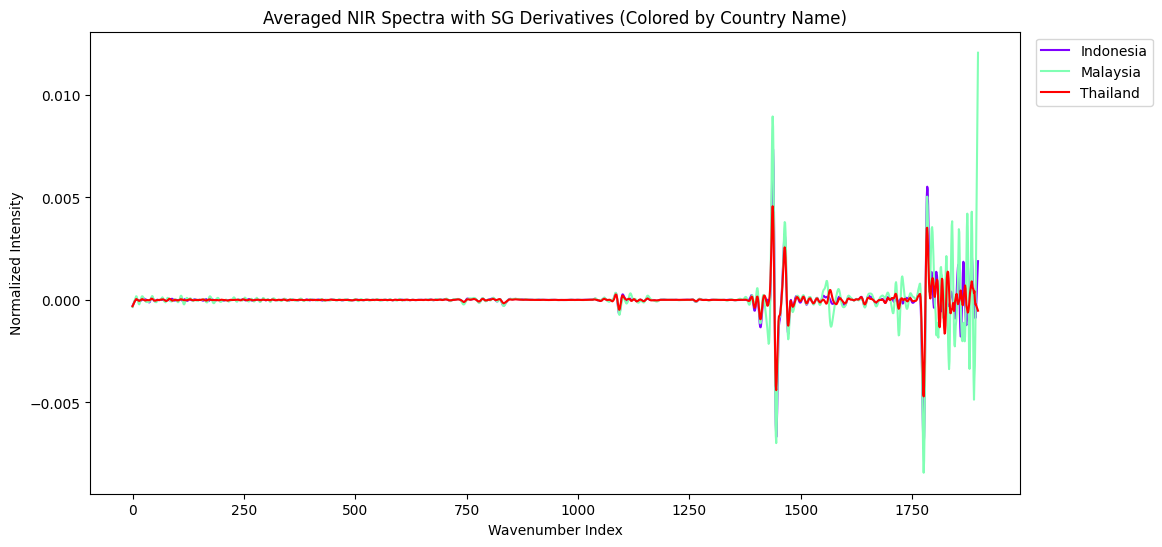

In [21]:
from scipy.signal import savgol_filter

# Savitzky-Golay Derivative
def savitzky_golay(input_data, window_size, poly_order, derivative_order):
    return savgol_filter(input_data, window_length=window_size, polyorder=poly_order, deriv=derivative_order, axis=1)

# Apply SG derivative (first order, window size 11, poly order 2)
sg_spectra = savitzky_golay(dataset5[spectra_columns].values, window_size=11, poly_order=2, derivative_order=1)
sg_spectra_df = pd.DataFrame(sg_spectra, columns=spectra_columns)

# Grouping and averaging the SG spectra by 'country_name'
dataset5[spectra_columns] = sg_spectra_df
grouped_by_country = dataset5.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra with SG Derivatives (Colored by Country Name)', grouped_by_country.index)


Without AVERAGING

In [22]:
dataset6 = dataset_cleaned.copy()

In [23]:
# Remove the 'thnoth_name_encoded' column
dataset6 = dataset.drop(columns=['thnoth_name_encoded'])

# Extracting relevant columns for normalization and averaging
spectra_columns = dataset6.columns[3:-5]  # Adjust column selection as needed

# Multiplicative Scatter Correction (MSC)
def msc(input_data, reference=None):
    input_data -= input_data.mean(axis=0)
    if reference is None:
        reference = np.mean(input_data, axis=0)
    corrected_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        fit = np.polyfit(reference, input_data[i, :], 1, full=True)
        corrected_data[i, :] = (input_data[i, :] - fit[0][1]) / fit[0][0]
    return corrected_data

# Standard Normal Variate (SNV)
def snv(input_data):
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, ddof=1, keepdims=True)

# Normalization
def normalize(input_data):
    return input_data / np.max(input_data, axis=1, keepdims=True)

# Norris-Williams Derivative
def norris_williams(input_data, gap_size, derivative_order):
    m, n = input_data.shape
    smoothed_data = np.zeros_like(input_data)
    for i in range(m):
        for j in range(gap_size, n-gap_size):
            if derivative_order == 1:
                smoothed_data[i, j] = (input_data[i, j + gap_size] - input_data[i, j - gap_size]) / (2 * gap_size)
            elif derivative_order == 2:
                smoothed_data[i, j] = (input_data[i, j + gap_size] - 2 * input_data[i, j] + input_data[i, j - gap_size]) / (gap_size ** 2)
    return smoothed_data

# Savitzky-Golay Derivative
def savitzky_golay(input_data, window_size, poly_order, derivative_order):
    return savgol_filter(input_data, window_length=window_size, polyorder=poly_order, deriv=derivative_order, axis=1)

# Function to plot individual spectra colored by a specific column
def plot_spectra(data, column, title):
    unique_values = data[column].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    plt.figure(figsize=(12, 6))
    for i, value in enumerate(unique_values):
        subset = data[data[column] == value]
        for idx, row in subset.iterrows():
            plt.plot(row[spectra_columns], color=colors[i], alpha=0.3)
        plt.plot([], [], color=colors[i], label=value)  # For legend
    
    plt.title(title)
    plt.xlabel('Wavenumber Index')
    plt.ylabel('Intensity')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


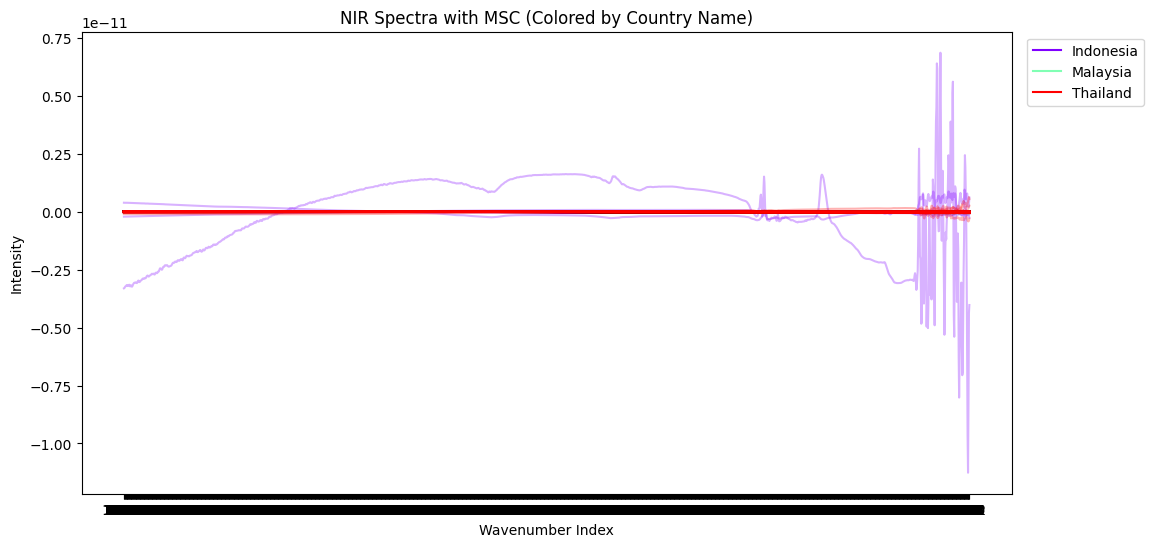

In [24]:
# 1. Multiplicative Scatter Correction (MSC)
msc_spectra = msc(dataset6[spectra_columns].values)
msc_spectra_df = pd.DataFrame(msc_spectra, columns=spectra_columns)
dataset6[spectra_columns] = msc_spectra_df
plot_spectra(dataset6, 'country_name', 'NIR Spectra with MSC (Colored by Country Name)')

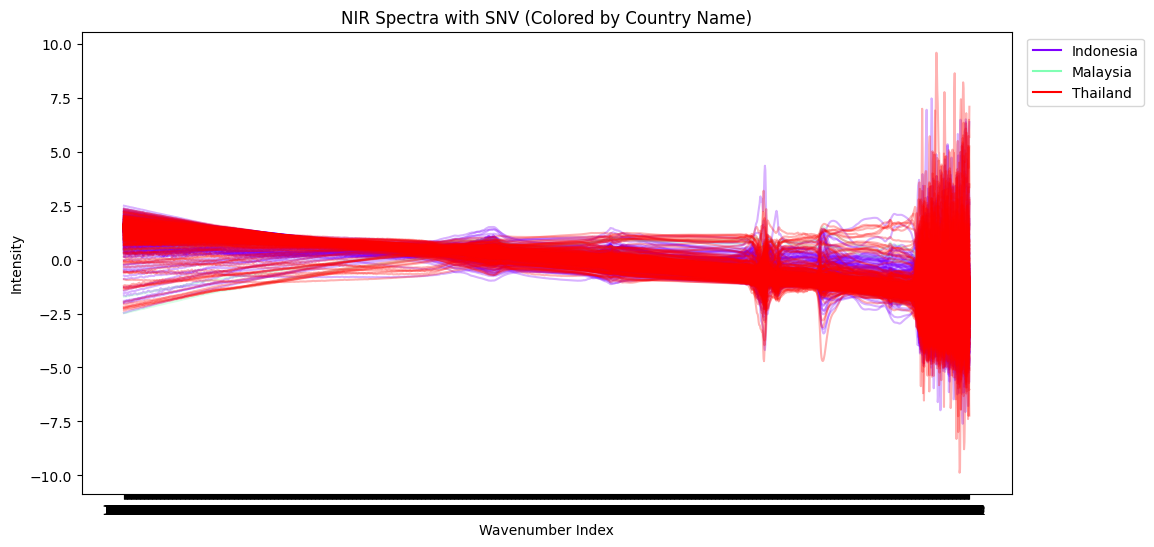

In [25]:
# 2. Standard Normal Variate (SNV)
snv_spectra = snv(dataset6[spectra_columns].values)
snv_spectra_df = pd.DataFrame(snv_spectra, columns=spectra_columns)
dataset6[spectra_columns] = snv_spectra_df
plot_spectra(dataset6, 'country_name', 'NIR Spectra with SNV (Colored by Country Name)')


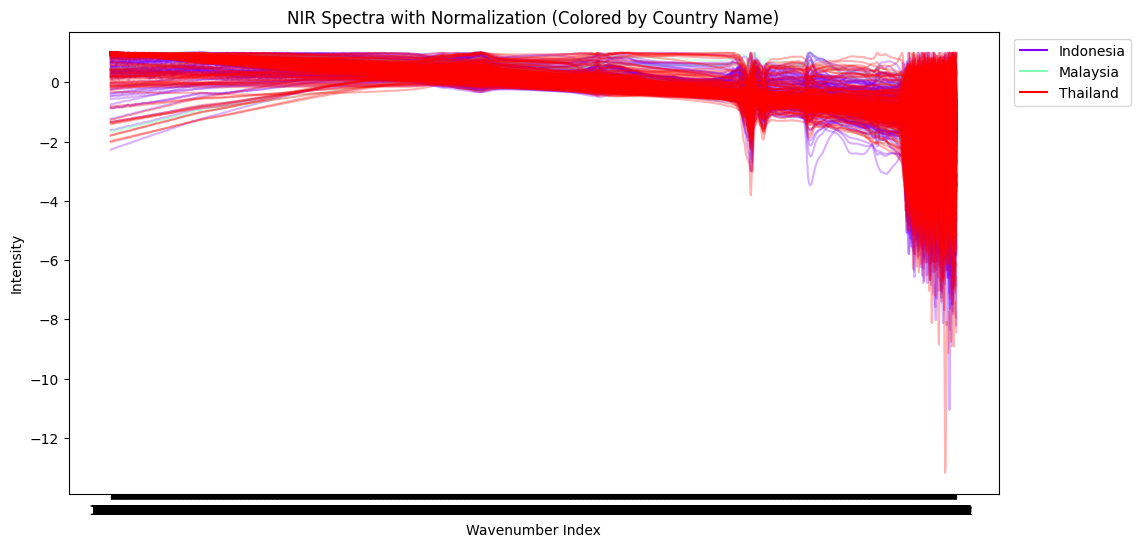

In [26]:
# 3. Normalization
normalized_spectra = normalize(dataset6[spectra_columns].values)
normalized_spectra_df = pd.DataFrame(normalized_spectra, columns=spectra_columns)
dataset6[spectra_columns] = normalized_spectra_df
plot_spectra(dataset6, 'country_name', 'NIR Spectra with Normalization (Colored by Country Name)')


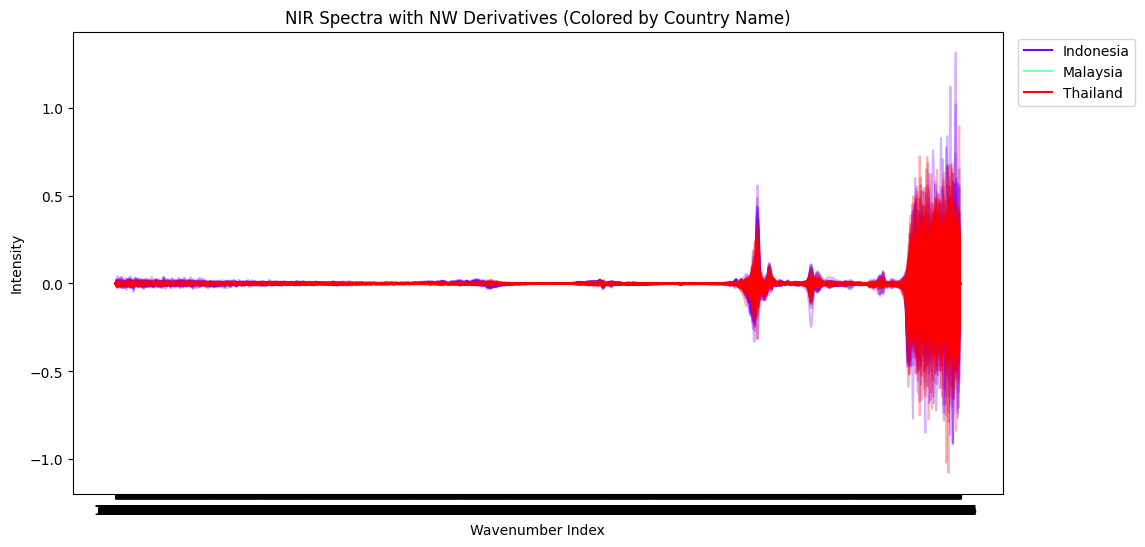

In [27]:
# 4. Norris-Williams Derivative (first order, gap size 3)
nw_spectra = norris_williams(dataset6[spectra_columns].values, gap_size=3, derivative_order=1)
nw_spectra_df = pd.DataFrame(nw_spectra, columns=spectra_columns)
dataset6[spectra_columns] = nw_spectra_df
plot_spectra(dataset6, 'country_name', 'NIR Spectra with NW Derivatives (Colored by Country Name)')


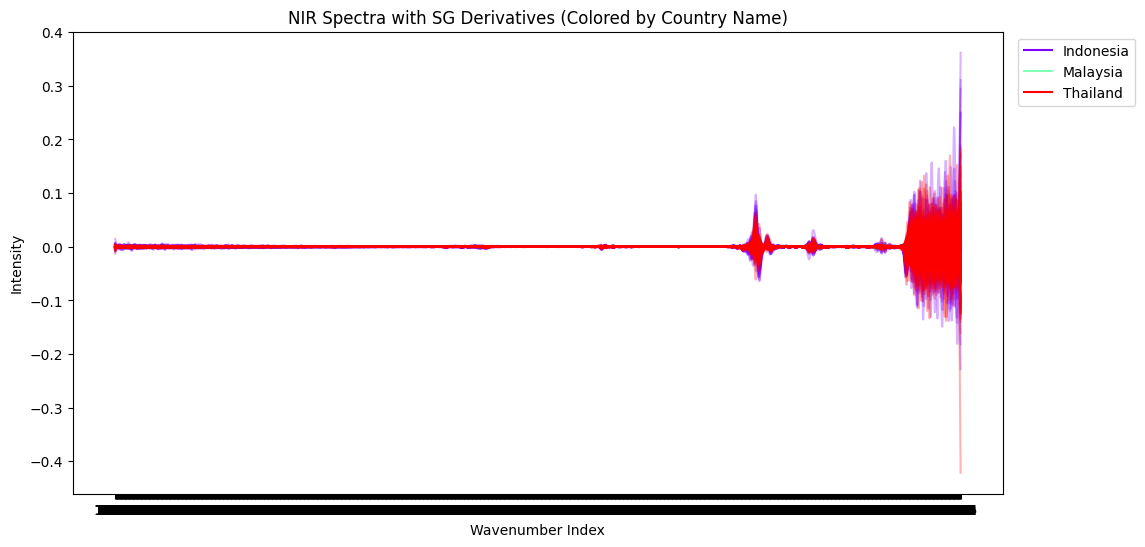

In [28]:
# 5. Savitzky-Golay Derivative (first order, window size 11, poly order 2)
sg_spectra = savitzky_golay(dataset6[spectra_columns].values, window_size=11, poly_order=2, derivative_order=1)
sg_spectra_df = pd.DataFrame(sg_spectra, columns=spectra_columns)
dataset6[spectra_columns] = sg_spectra_df
plot_spectra(dataset6, 'country_name', 'NIR Spectra with SG Derivatives (Colored by Country Name)')

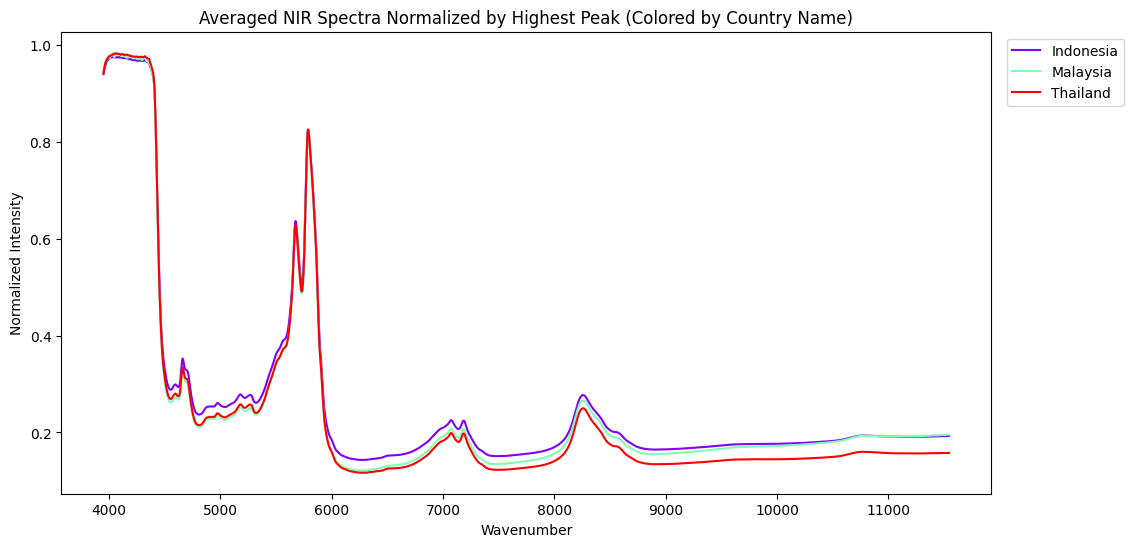

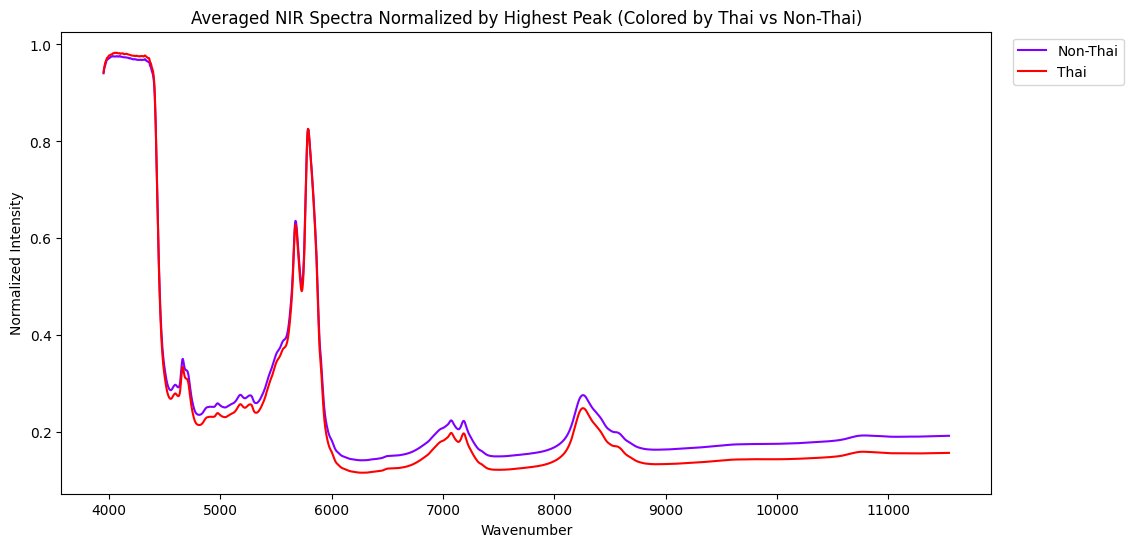

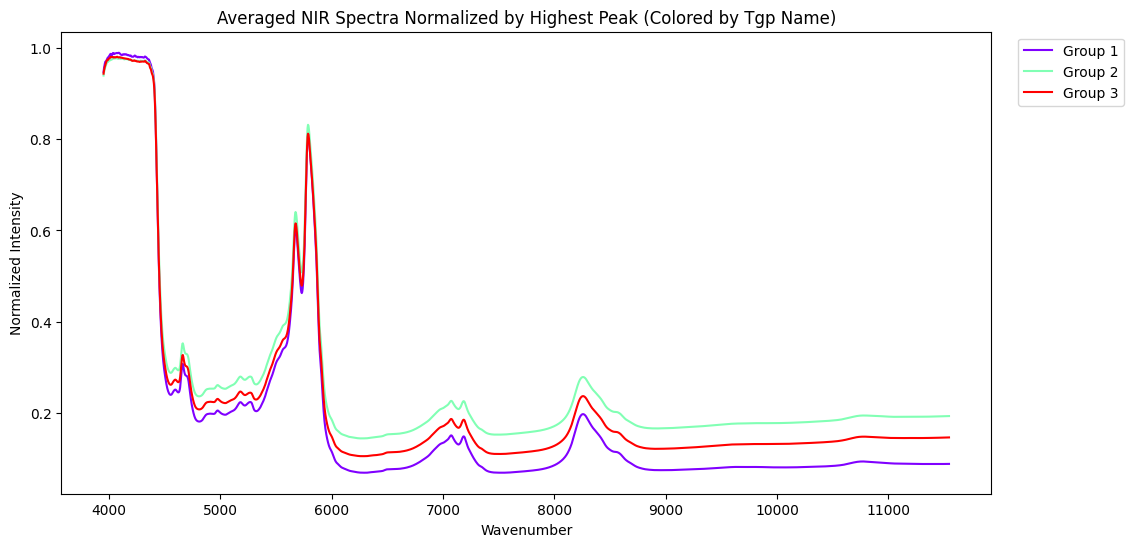

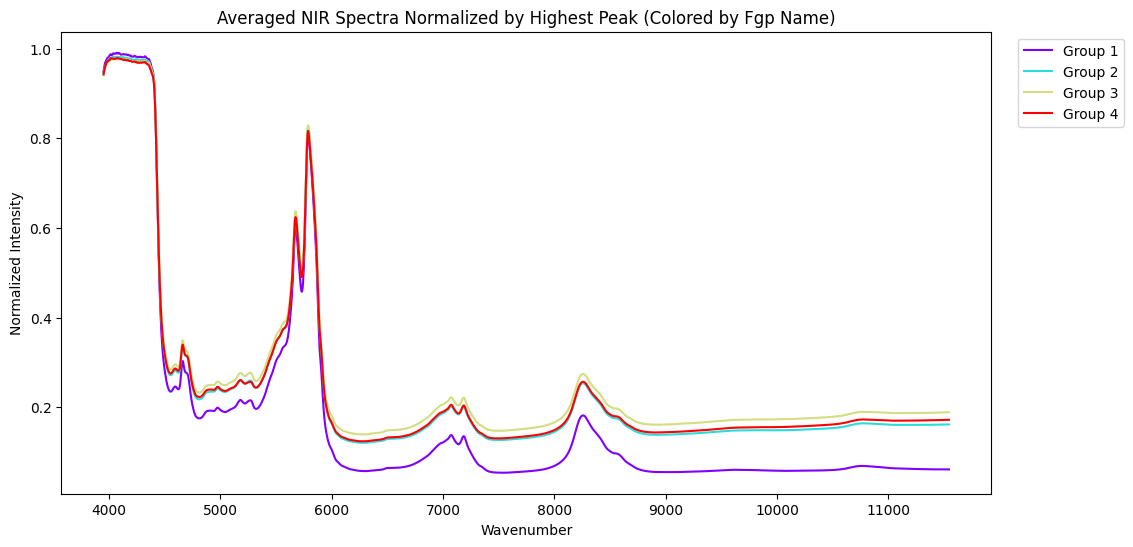

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_DIST_3b.csv"
dataset = pd.read_csv(file_path)

# Remove the 'thnoth_name_encoded' column
dataset_cleaned = dataset.drop(columns=['thnoth_name_encoded'])

# Extracting relevant columns for normalization and averaging
spectra_columns = dataset_cleaned.columns[3:-5]  # Adjust column selection as needed

# Normalize each spectrum by the highest peak
dataset_cleaned[spectra_columns] = dataset_cleaned[spectra_columns].div(dataset_cleaned[spectra_columns].max(axis=1), axis=0)

# Extract the wavenumber values
wavenumber_values = dataset_cleaned.columns[3:-5].astype(float)

# Function to plot averaged spectra for each category
def plot_averaged_spectra(data, title, labels):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

    for i, (label, spectrum) in enumerate(data.items()):
        plt.plot(wavenumber_values, spectrum, color=colors[i], label=label)
    
    plt.title(title)
    plt.xlabel('Wavenumber')
    plt.ylabel('Normalized Intensity')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# 1. Grouping and averaging the spectra by 'country_name'
grouped_by_country = dataset_cleaned.groupby('country_name').mean(numeric_only=True)
country_spectra = {country: grouped_by_country.loc[country].values for country in grouped_by_country.index}
plot_averaged_spectra(country_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Country Name)', grouped_by_country.index)

# 2. Grouping and averaging the spectra by 'thnoth_name'
grouped_by_thnoth = dataset_cleaned.groupby('thnoth_name').mean(numeric_only=True)
thnoth_spectra = {thnoth: grouped_by_thnoth.loc[thnoth].values for thnoth in grouped_by_thnoth.index}
plot_averaged_spectra(thnoth_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Thai vs Non-Thai)', grouped_by_thnoth.index)

# 3. Grouping and averaging the spectra by 'tgp_name'
grouped_by_tgp = dataset_cleaned.groupby('tgp_name').mean(numeric_only=True)
tgp_spectra = {tgp: grouped_by_tgp.loc[tgp].values for tgp in grouped_by_tgp.index}
plot_averaged_spectra(tgp_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Tgp Name)', grouped_by_tgp.index)

# 4. Grouping and averaging the spectra by 'fgp_name'
grouped_by_fgp = dataset_cleaned.groupby('fgp_name').mean(numeric_only=True)
fgp_spectra = {fgp: grouped_by_fgp.loc[fgp].values for fgp in grouped_by_fgp.index}
plot_averaged_spectra(fgp_spectra, 'Averaged NIR Spectra Normalized by Highest Peak (Colored by Fgp Name)', grouped_by_fgp.index)
